In [340]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [341]:
df = pd.read_csv("FY016.csv")
df.head(20)

,Statistic Label,CensusYear,Sex,Age Group,Birthplace,UNIT,VALUE
0,Population Usually Resident and Present in the...,2011,Both sexes,All ages,All countries,Number,4525281.0
1,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county of usual residence,Number,2825408.0
2,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county other than county of usual re...,Number,933103.0
3,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Northern Ireland,Number,58470.0
4,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Scotland,Number,17871.0
5,Population Usually Resident and Present in the...,2011,Both sexes,All ages,England and Wales,Number,212296.0
6,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Austria,Number,708.0
7,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Belgium,Number,1479.0
8,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Bulgaria,Number,1783.0
9,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Croatia,Number,980.0


In [342]:
df.shape

(19926, 7)

In [343]:
df.dtypes

Statistic Label     object
CensusYear           int64
Sex                 object
Age Group           object
Birthplace          object
UNIT                object
VALUE              float64
dtype: object

In [344]:
df.describe()

,CensusYear,VALUE
count,19926.000000,1.992600e+04
mean,2016.333333,5.979170e+03
std,4.497025,9.428216e+04
min,2011.000000,-4.563800e+04
25%,2011.000000,0.000000e+00
50%,2016.000000,2.800000e+01
75%,2022.000000,1.590000e+02
max,2022.000000,5.084879e+06


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19926 entries, 0 to 19925
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  19926 non-null  object 
 1   CensusYear       19926 non-null  int64  
 2   Sex              19926 non-null  object 
 3   Age Group        19926 non-null  object 
 4   Birthplace       19926 non-null  object 
 5   UNIT             19926 non-null  object 
 6   VALUE            19926 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [346]:
df.rename(columns = {"Statistic Label": "Stat_label", "CensusYear": "Year", "Sex": "Gender", "Age Group": "Age_group","Birthplace": "Nationality", "VALUE": "Value"}, inplace = True)
df.drop(columns = ["UNIT"], inplace = True)
df

,Stat_label,Year,Gender,Age_group,Nationality,Value
0,Population Usually Resident and Present in the...,2011,Both sexes,All ages,All countries,4525281.0
1,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county of usual residence,2825408.0
2,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county other than county of usual re...,933103.0
3,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Northern Ireland,58470.0
4,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Scotland,17871.0
...,...,...,...,...,...,...
19921,Percentage change since previous census,2022,Female,65 years and over,Venezuela (Bolivarian Republic of),360.0
19922,Percentage change since previous census,2022,Female,65 years and over,Other America(2),110.9
19923,Percentage change since previous census,2022,Female,65 years and over,Australia,67.6
19924,Percentage change since previous census,2022,Female,65 years and over,New Zealand,51.9


In [347]:
print(f'Stat_label: {df["Stat_label"].unique()}')
print(f'Stat_label: {df["Stat_label"].nunique()}')

Stat_label: ['Population Usually Resident and Present in the State'
 'Actual change since previous census'
 'Percentage change since previous census']
Stat_label: 3


In [348]:
df_population = df.loc[df["Stat_label"] == "Population Usually Resident and Present in the State"]
df_population.head()

,Stat_label,Year,Gender,Age_group,Nationality,Value
0,Population Usually Resident and Present in the...,2011,Both sexes,All ages,All countries,4525281.0
1,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county of usual residence,2825408.0
2,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Ireland - county other than county of usual re...,933103.0
3,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Northern Ireland,58470.0
4,Population Usually Resident and Present in the...,2011,Both sexes,All ages,Scotland,17871.0


In [349]:
df_population.tail()

,Stat_label,Year,Gender,Age_group,Nationality,Value
6637,Population Usually Resident and Present in the...,2022,Female,65 years and over,Venezuela (Bolivarian Republic of),23.0
6638,Population Usually Resident and Present in the...,2022,Female,65 years and over,Other America(2),97.0
6639,Population Usually Resident and Present in the...,2022,Female,65 years and over,Australia,186.0
6640,Population Usually Resident and Present in the...,2022,Female,65 years and over,New Zealand,82.0
6641,Population Usually Resident and Present in the...,2022,Female,65 years and over,Other countries,50.0


In [350]:
print(f'Year: {df_population["Year"].unique()}')
print(f'Year categories: {df_population["Year"].unique()}')

Year: [2011 2016 2022]
Year categories: [2011 2016 2022]


In [351]:
print(f'Gender: {df_population["Gender"].unique()}')
print(f'Gender categories: {df_population["Gender"].nunique()}')

Gender: ['Both sexes' 'Male' 'Female']
Gender categories: 3


In [352]:
print(f'Age_group: {df_population["Age_group"].unique()}')
print(f'Age_group categories: {df_population["Age_group"].nunique()}')

Age_group: ['All ages' '0 - 14 years' '15 - 24 years' '25 - 44 years' '45 - 64 years'
 '65 years and over']
Age_group categories: 6


In [353]:
print(f'Nationality: {df_population["Nationality"].unique()}')
print(f'Nationality: {df_population["Nationality"].nunique()}')

Nationality: ['All countries' 'Ireland - county of usual residence'
 'Ireland - county other than county of usual residence'
 'Northern Ireland' 'Scotland' 'England and Wales' 'Austria' 'Belgium'
 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Italy' 'Latvia' 'Lithuania'
 'Luxembourg' 'Malta' 'Netherlands (the)' 'Poland' 'Portugal' 'Romania'
 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Albania' 'Belarus'
 'Bosnia and Herzegovina' 'Kosovo' 'Moldova (the Republic of)' 'Norway'
 'Russian Federation (the)' 'Serbia' 'Switzerland' 'Turkiye' 'Ukraine'
 'Other Europe(1)' 'Algeria' 'Angola' 'Botswana' 'Cameroon' 'Congo'
 'Egypt' 'Ethiopia' 'Ghana' "Côte d'Ivoire" 'Kenya' 'Liberia' 'Libya'
 'Malawi' 'Mauritius' 'Morocco' 'Nigeria' 'Sierra Leone' 'Somalia'
 'South Africa' 'Sudan (the)' 'Tanzania, the United Republic of' 'Togo'
 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Other Africa(2)' 'Afghanistan'
 'Bahrain' 'Bangladesh' 'Myanmar' 'China'

In [354]:
print(f'Year: {pd.api.types.is_numeric_dtype(df_population.Year)}')
print(f'Gender: {pd.api.types.is_numeric_dtype(df_population.Gender)}')
print(f'Age Group: {pd.api.types.is_numeric_dtype(df_population.Age_group)}')
print(f'Nationality: {pd.api.types.is_numeric_dtype(df_population.Nationality)}')
print(f'Value: {pd.api.types.is_numeric_dtype(df_population.Value)}')

Year: True
Gender: False
Age Group: False
Nationality: False
Value: True


In [355]:
df_population.isna().sum()

Stat_label     0
Year           0
Gender         0
Age_group      0
Nationality    0
Value          0
dtype: int64

In [356]:
df_population.describe()

,Year,Value
count,6642.000000,6.642000e+03
mean,2016.333333,1.722383e+04
std,4.497251,1.625123e+05
min,2011.000000,0.000000e+00
25%,2011.000000,4.500000e+01
50%,2016.000000,1.750000e+02
75%,2022.000000,7.567500e+02
max,2022.000000,5.084879e+06


In [357]:
df_population.shape

(6642, 6)

In [358]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6642 entries, 0 to 6641
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stat_label   6642 non-null   object 
 1   Year         6642 non-null   int64  
 2   Gender       6642 non-null   object 
 3   Age_group    6642 non-null   object 
 4   Nationality  6642 non-null   object 
 5   Value        6642 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 363.2+ KB


In [366]:
df_population_groups = df_population.loc[df_population["Nationality"] != "All countries"].loc[df_population["Gender"] != "Both sexes"].loc[df_population["Age_group"] == "All ages"].groupby("Year")["Value"].sum()
df_population_groups

Year
2011    4525281.0
2016    4689921.0
2022    5084879.0
Name: Value, dtype: float64

In [369]:
df_population_groups1 = df_population.loc[df_population["Nationality"] == "All countries"].loc[df_population["Gender"] == "Both sexes"].loc[df_population["Age_group"] == "All ages"].groupby("Year")["Value"].sum()
df_population_groups

Year
2011    4525281.0
2016    4689921.0
2022    5084879.0
Name: Value, dtype: float64

<Axes: xlabel='Year', ylabel='Value'>

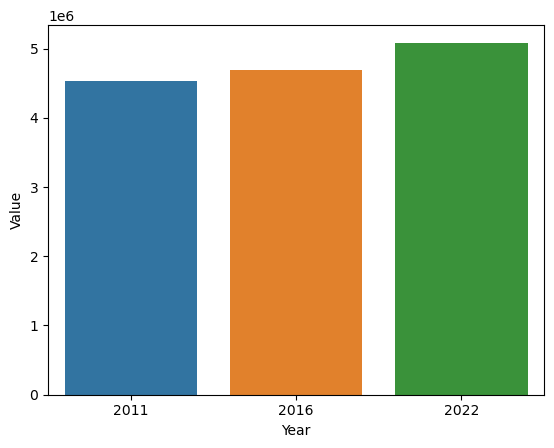

In [379]:
sns.barplot(data = df_population.loc[df_population["Nationality"] == "All countries"].loc[df_population["Gender"] == "Both sexes"].loc[df_population["Age_group"] == "All ages"], x = "Year", y = "Value")

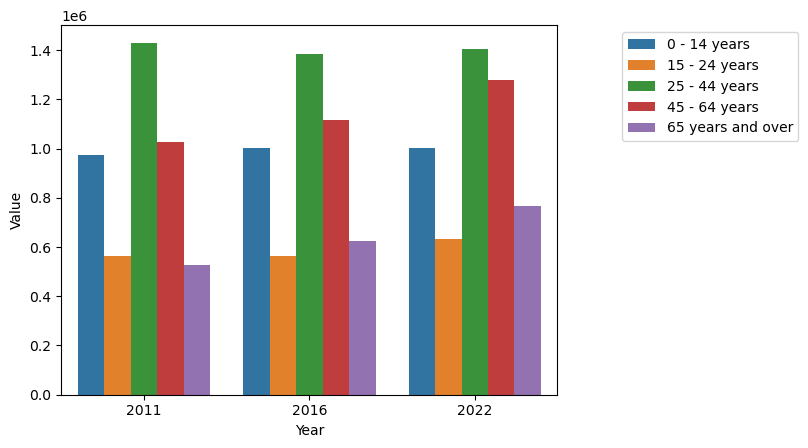

In [384]:
sns.barplot(data = df_population.loc[df_population["Nationality"] == "All countries"].loc[df_population["Gender"] == "Both sexes"].loc[df_population["Age_group"] != "All ages"], x = "Year", y = "Value", hue = "Age_group");
plt.legend(loc = "upper right", bbox_to_anchor = (1.5,1))